In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

In [2]:
# 데이터 불러오기
hourly_smp = pd.read_csv('data/hourly_smp_v1.csv')

# 데이터 전처리
hourly_smp['datetime'] = pd.to_datetime(hourly_smp['datetime'].str.replace('24:00', '00:00'))
hourly_smp['datetime'] = hourly_smp['datetime'].apply(lambda x: x+pd.Timedelta(days=1) if x.hour==0 else x)
hourly_smp = hourly_smp.set_index('datetime')

daily_smp = hourly_smp.resample('D').mean()
weekly_smp = hourly_smp.resample('W').mean()
monthly_smp = hourly_smp.resample('M').mean()

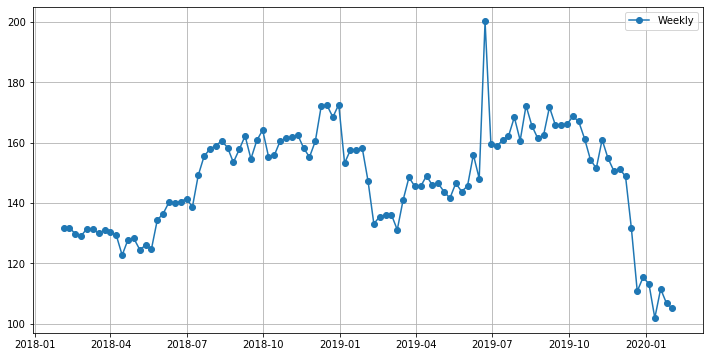

In [45]:
# 시각화
plt.figure(figsize=(12,6))
# plt.plot(hourly_smp, label='Hourly')
# plt.plot(daily_smp, label='Daily')
plt.plot(weekly_smp, '-o', label='Weekly')
# plt.plot(monthly_smp, label='Monthly')
plt.legend()
plt.grid()
plt.show()

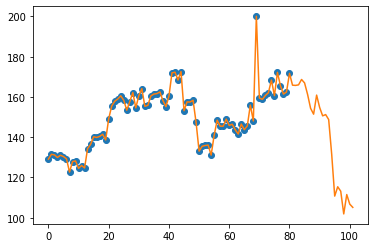

In [54]:
plt.plot(y_train, 'o')
plt.plot(data[n:])

In [75]:
# 훈련 및 검증 데이터 생성
data = np.array(weekly_smp['smp'])

n = 3
k = 1-1
X_train_stack = []
for i in range(n):
    X_train_stack.append(data[i:i-n-k])
X_train = np.c_[X_train_stack].T
X_train = X_train[:,:,np.newaxis]
y_train = data[n+k:]

m = int(len(y_train)*0.90)
(X_train, y_train), (X_test, y_test) = (X_train[:m], y_train[:m]), (X_train[m:], y_train[m:])

In [79]:
# 모델 생성 (LSTM)
model = Sequential()
model.add(LSTM(10, input_shape=(n,1)))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam')

In [80]:
# 모델 훈련
cp_callback = tf.keras.callbacks.ModelCheckpoint('cpts/smp_lstm_20200504', save_weights_only=True, verbose=0)
result = model.fit(X_train, y_train, epochs=100, verbose=0, callbacks=[cp_callback], validation_data=(X_test, y_test))

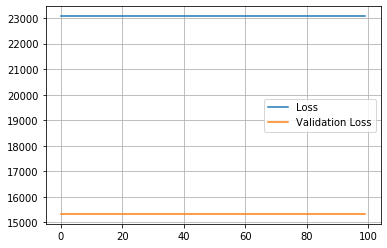

In [81]:
# 시각화 (2)
plt.plot(result.history['loss'], label='Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid()
plt.show()

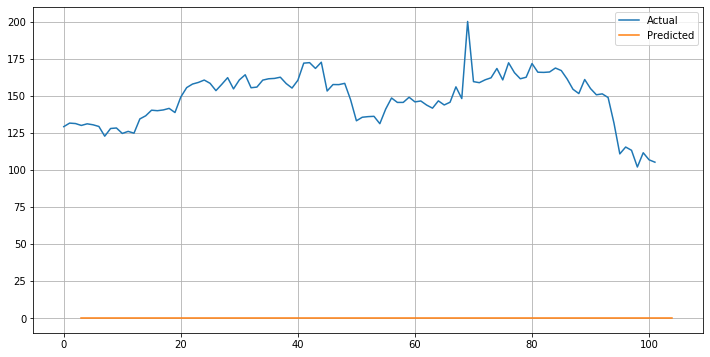

In [82]:
# 시각화 (3)
plt.figure(figsize=(12,6))
y_pred = model.predict(np.r_[X_train, X_test])
y_actual = np.r_[y_train, y_test]
plt.plot(y_actual, label='Actual')
plt.plot(np.arange(n+k, len(data)), y_pred, label='Predicted')
plt.legend()
plt.grid()
plt.show()

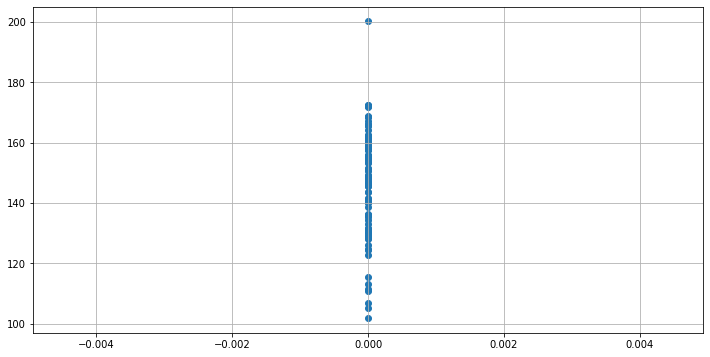

In [83]:
# 시각화 (4)
plt.figure(figsize=(12,6))
plt.scatter(y_pred, y_actual)
plt.grid()
plt.show()